# downloder.py content

In [2]:
from solar_tracking.downloader import download_fits

start_time = "2023-11-24 00:00:00"
end_time   = "2025-11-25 10:00:00"
instrument = "hmi"  # Angenommen, "hmi" ist in a.Instrument enthalten.
sample_seperation = 1

#download_fits(start_time, end_time, instrument, sample_seperation)

In [ ]:
from solar_tracking.tracking import run_tracking

run_tracking(trace=2, interactive=True)

Number of detected spots: 15


<class 'numpy.ndarray'>
0 255


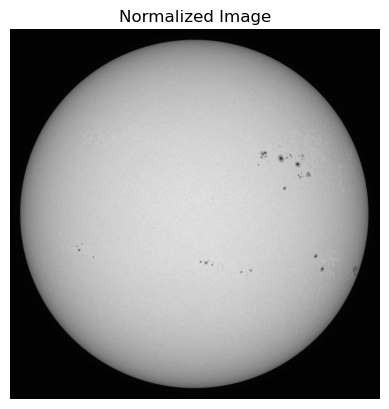

In [2]:
from solar_tracking.image_processing import image_processing_fits
import matplotlib.pyplot as plt
import numpy as np

image = image_processing_fits("data/TR_01/hmi_ic_45s_2023_11_23_00_01_30_tai_continuum.fits",1)

print(type(image))
print(np.min(image), np.max(image))

# Display the normalized image using Matplotlib (better for Jupyter Notebooks)
plt.imshow(image, cmap = 'gray')
plt.title("Normalized Image")
plt.axis('off')  # Hide the axis for clarity
plt.show()

In [1]:
import matplotlib.pyplot as plt
import cv2
from solar_tracking.sunspot_detection import sun_infos

image = image_processing_fits("data/TR_01/hmi_ic_45s_2023_11_23_06_01_30_tai_continuum.fits",1)

sun_radius, sun_center, res = sun_infos("data/TR_01/hmi_ic_45s_2023_11_23_06_01_30_tai_continuum.fits",1)

# Vorverarbeitung des Bildes
image_blur = cv2.GaussianBlur(image, (13, 13), 0)
binary_img = cv2.adaptiveThreshold(image_blur, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV,
                                   301, 30)
binary_img = cv2.dilate(binary_img, None, iterations=1)
binary_img = cv2.erode(binary_img, None, iterations=1)
# Verbundene Komponenten (Connected Components) ermitteln
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_img)

max_area: int = 300,
min_area: int = 20,
max_distance_ratio: float = 0.9
min_distance_between_clusters: int = 20

# Spots nach Fläche und Entfernung filtern
filtered_boxes = []
filtered_centroids = []

for label in range(1, num_labels):  # Hintergrund (Label 0) überspringen
    area = stats[label, cv2.CC_STAT_AREA]
    if not (min_area < area < max_area):
        continue
    
    centroid = centroids[label]
    # Abstand vom Spot-Zentroid zum Sonnenmittelpunkt
    distance = np.linalg.norm(np.array(centroid) - np.array(sun_center))
    print(f"Distance{distance}, max_distance_ratio {max_distance_ratio}")
    if distance > max_distance_ratio * sun_radius:
        continue
    
    x = stats[label, cv2.CC_STAT_LEFT]
    y = stats[label, cv2.CC_STAT_TOP]
    w = stats[label, cv2.CC_STAT_WIDTH]
    h = stats[label, cv2.CC_STAT_HEIGHT]
    filtered_boxes.append((x, y, w, h))
    filtered_centroids.append(centroid)

print(filtered_boxes)

NameError: name 'image_processing_fits' is not defined